# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [2]:
import numpy as np

import pandas as pd # your favorite data package
import matplotlib.pyplot as plt  # your favorite visualization package
import seaborn as sns

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [224]:
df = pd.read_csv('train.zip')

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [225]:
df = df.drop('dropoff_datetime', axis=1)

In [226]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

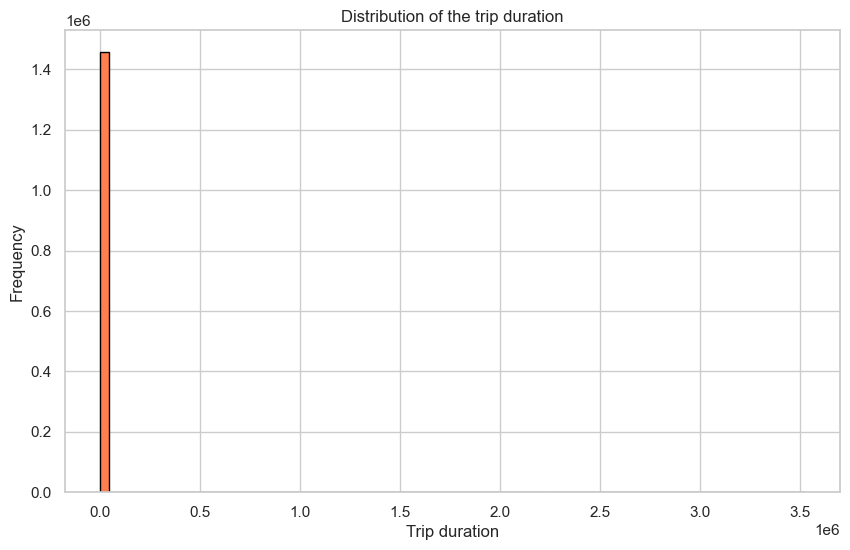

In [227]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=80, color='coral', edgecolor='black')
plt.title('Distribution of the trip duration')
plt.xlabel('Trip duration')
plt.ylabel('Frequency')
plt.show()

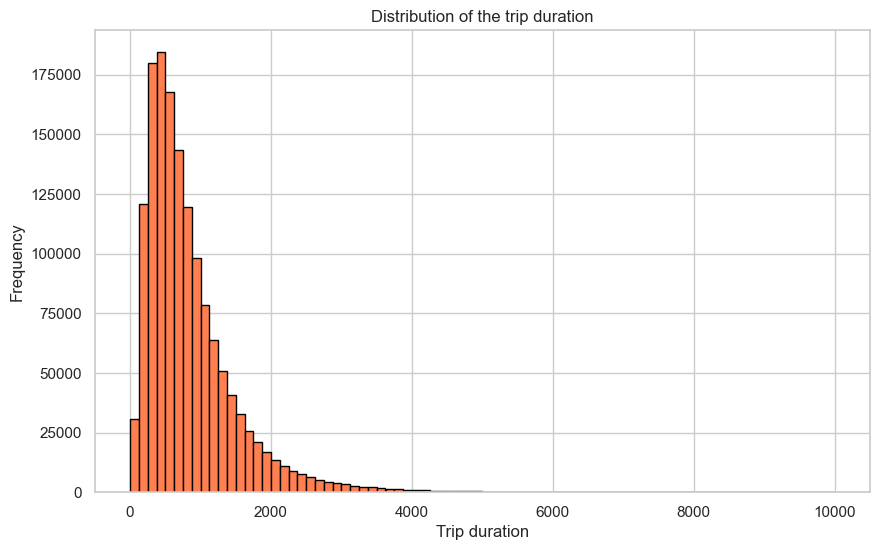

In [228]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=80, range=(0,10000), color='coral', edgecolor='black')
plt.title('Distribution of the trip duration')
plt.xlabel('Trip duration')
plt.ylabel('Frequency')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: на первом графике, при выводе гистограммы, видно, что значения целевой выборки сосредоточены на небольших значениях(500-1000). Чтобы более подробно рассмотреть какие именно значения принимала целевая переменная, я ограничил график, с помощью него можно увидеть, что большинство поездок были недолгими, но также наблюдаются выбросы из очень длинных и кортких поездок. Смотря на масштаб чисел целевой переменной, можно с уверенностью сказать, что целевая переменная измеряется в секундах 

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: метрику RMSLE авторы выбрали из-за сильного перекоса в распределении данных, так как есть редкие выбросы, но с очень большими значениями, которые сильно влияют на ошибку(особенно RMSE). В то же время RMSLE, которая использует логарифм, сохраняет устойчивость на выбросах.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: если подставить $a(x_i) = \exp(\hat{a}(x_i)) - 1$ и $\hat{y}_i = \log{(y_i + 1)}$ в RMSLE, то получим $\sqrt{{1}/{l}\sum_{i=1}^{l}(\hat{y}_i - \hat{a}(x_i))^{2}} $

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

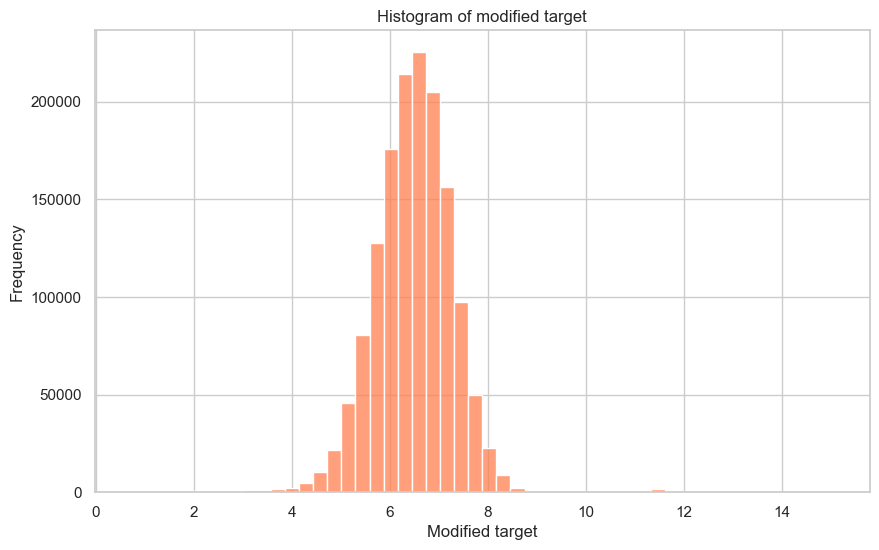

In [230]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

plt.figure(figsize=(10, 6))
sns.histplot(df['log_trip_duration'], bins=50, color='coral')
plt.title('Histogram of modified target')
plt.xlabel('Modified target')
plt.ylabel('Frequency')
plt.show()

In [231]:
df = df.drop('trip_duration', axis=1)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [232]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred )**2))
    raise NotImplementedError

rmsle_best_const = rmsle(df['log_trip_duration'], np.full_like(df['log_trip_duration'], df['log_trip_duration'].mean()))

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

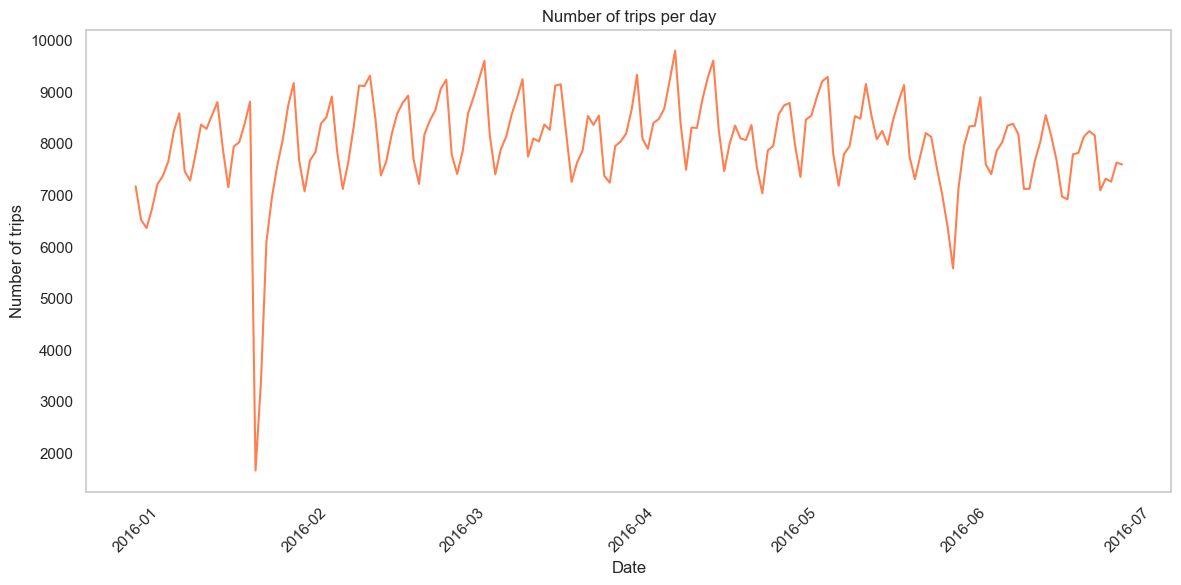

In [233]:
df['date'] = df['pickup_datetime'].dt.date

trips_per_day = df.groupby('date').size()

plt.figure(figsize=(14, 6))
trips_per_day.plot(kind='line', color='coral')
plt.title('Number of trips per day')
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.grid()
plt.show()

df = df.drop('date', axis=1)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: Если рассматривать 23-24 января 2016 года как два периода, в эти дни был снегопад и власти США ввели запрет на движение транспорта. Также есть период 30 мая 2016 года, в тот день произошел взрыв в центре города.

In [234]:
lowest_trips = trips_per_day.nsmallest(3)
lowest_trips

date
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
dtype: int64

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

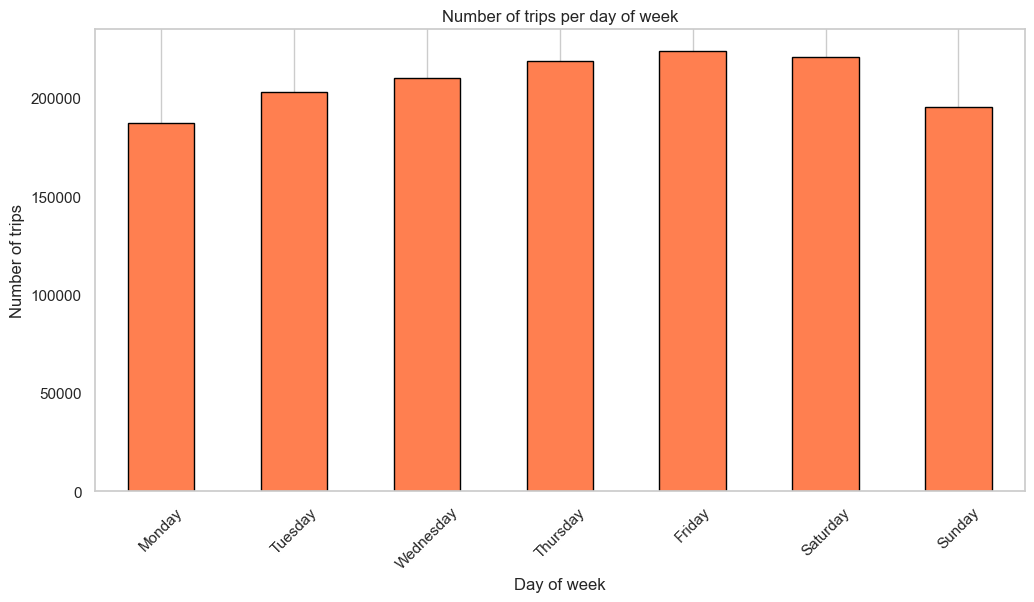

In [235]:
#эти признаки все равно пригодятся в будущем
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

trips_per_day_of_week = df.groupby('day_of_week').size()

plt.figure(figsize=(12, 6))
trips_per_day_of_week.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of trips per day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of trips')
plt.xticks(rotation=45, ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis='y')
plt.show()

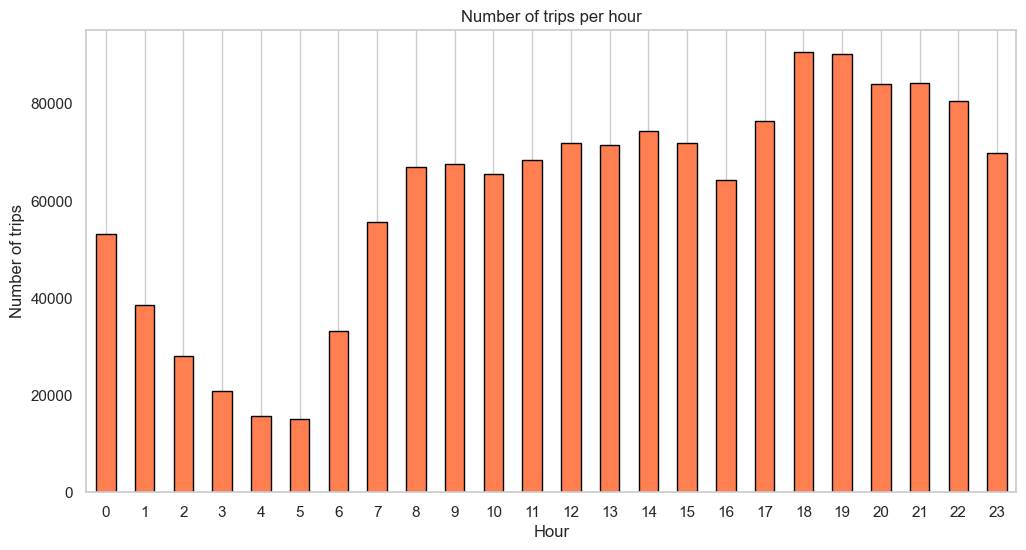

In [236]:
df['hour'] = df['pickup_datetime'].dt.hour

trips_per_hour = df.groupby('hour').size()

plt.figure(figsize=(12, 6))
trips_per_hour.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of trips per hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

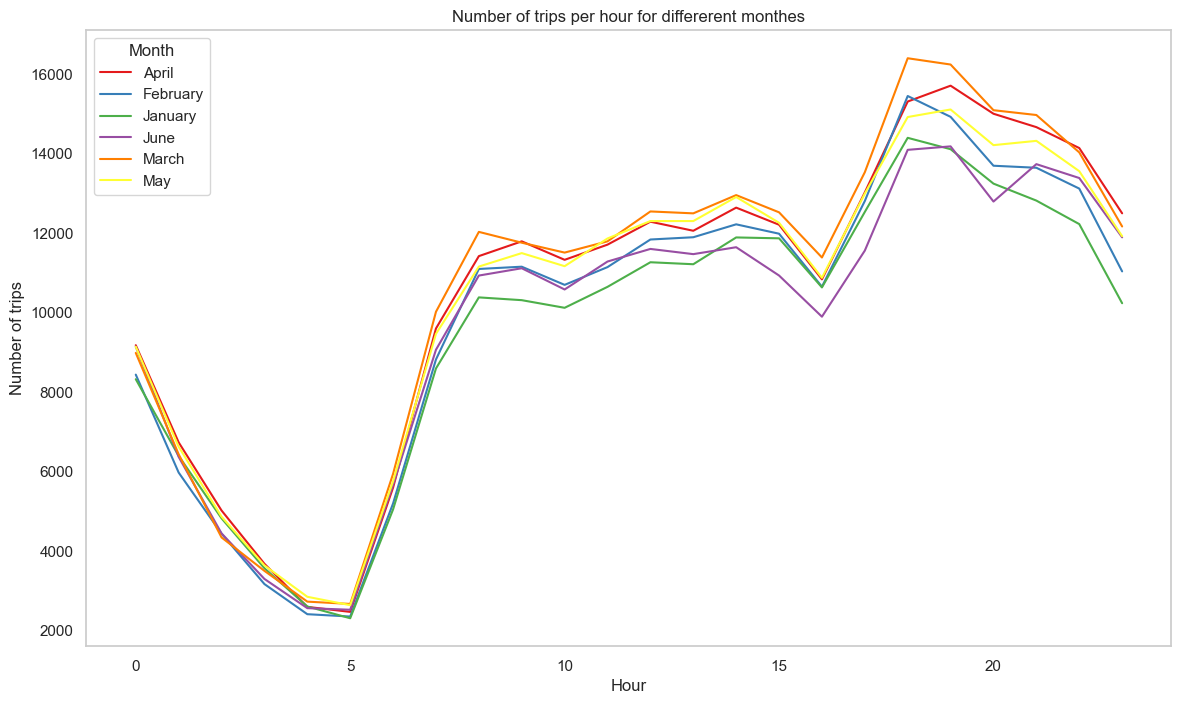

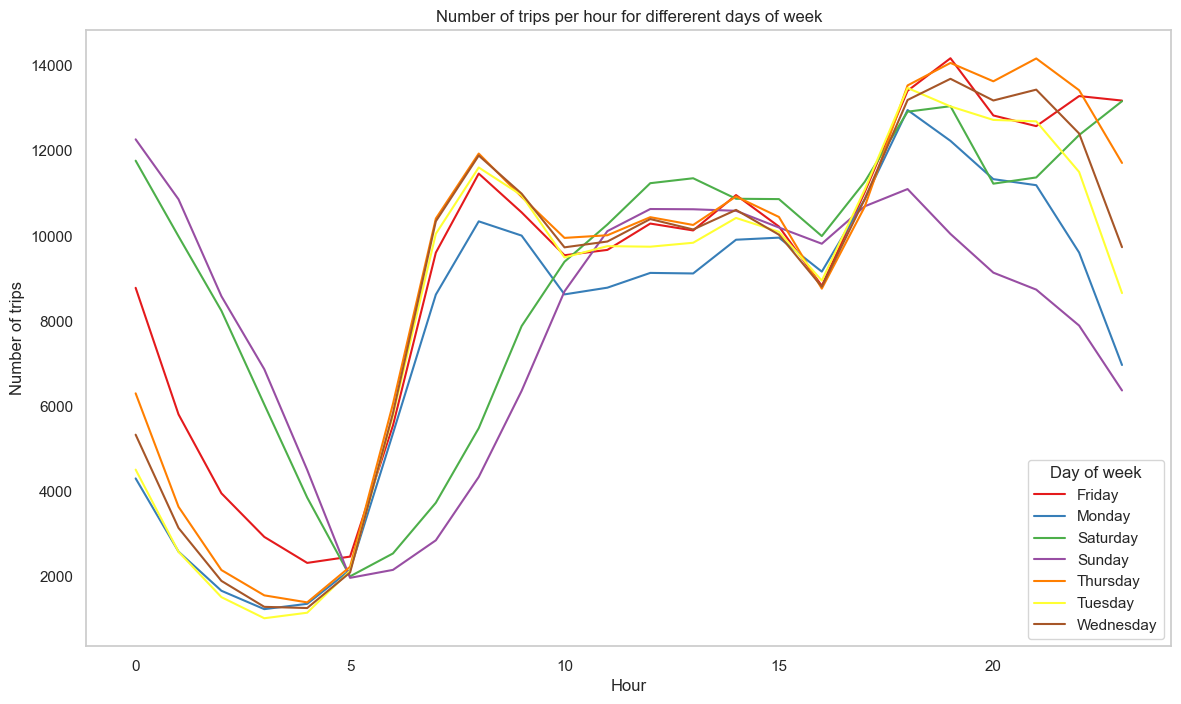

In [237]:
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',5: 'Saturday', 6: 'Sunday'}


df['month'] = df['pickup_datetime'].dt.month.map(month_names)

trips_per_hour_month = df.groupby(['month', 'hour']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(data=trips_per_hour_month, x='hour', y='count', hue='month', palette='Set1')
plt.title('Number of trips per hour for differerent monthes')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.legend(title='Month')
plt.grid()
plt.show()

df['day_of_week'] = df['pickup_datetime'].dt.dayofweek.map(day_names)

trips_per_hour_day = df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(data=trips_per_hour_day, x='hour', y='count', hue='day_of_week', palette='Set1')
plt.title('Number of trips per hour for differerent days of week')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.legend(title='Day of week')
plt.grid()
plt.show()


**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Можно четко увидеть, что в воскресенье и субботу количество поездок с 00 до 05 часов наибольшее, с 05 до 10 больше всего поездок в будни, 10 до 15 и в будние и в выходные примерное одинаковое количество поездок, с ~16 до 20 часов количество поездок в понедельник-субботу возрастает(так как люди возвращаются с работыв будни или едут отдыхать в субботу), в воскресенье же количество поездок не настолько большое, так как большинство людей в данное время готовятся к рабочей неделе. Ближе к полуночи количество поездок убывает. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

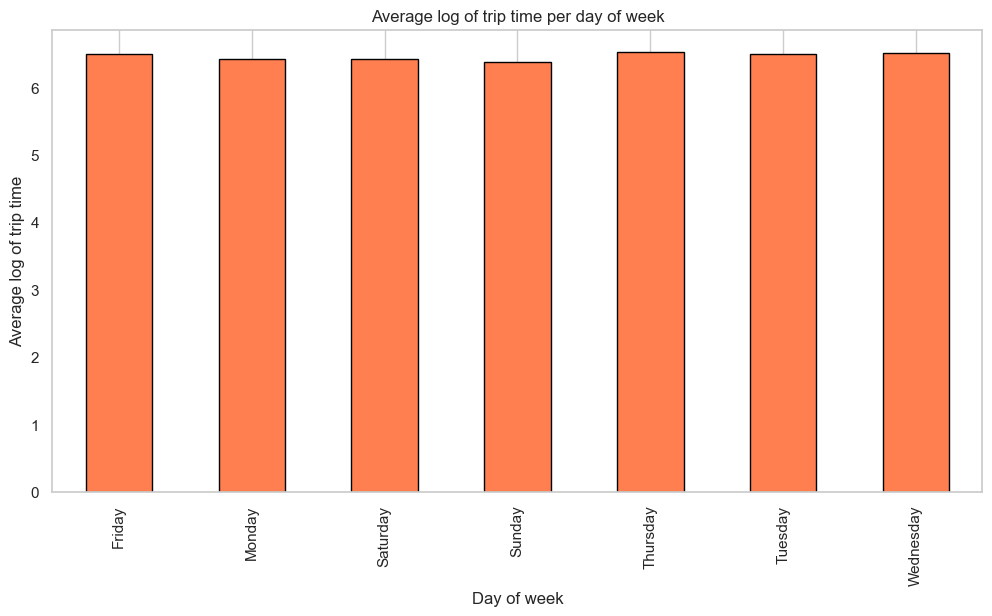

In [238]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)

log_trip_duration_per_day = df_train.groupby('day_of_week')['log_trip_duration'].mean()

plt.figure(figsize=(12, 6))
log_trip_duration_per_day.plot(kind = 'bar', color='coral', edgecolor='black')
plt.title('Average log of trip time per day of week')
plt.xlabel('Day of week')
plt.ylabel('Average log of trip time')
plt.grid(axis='y')
plt.show()

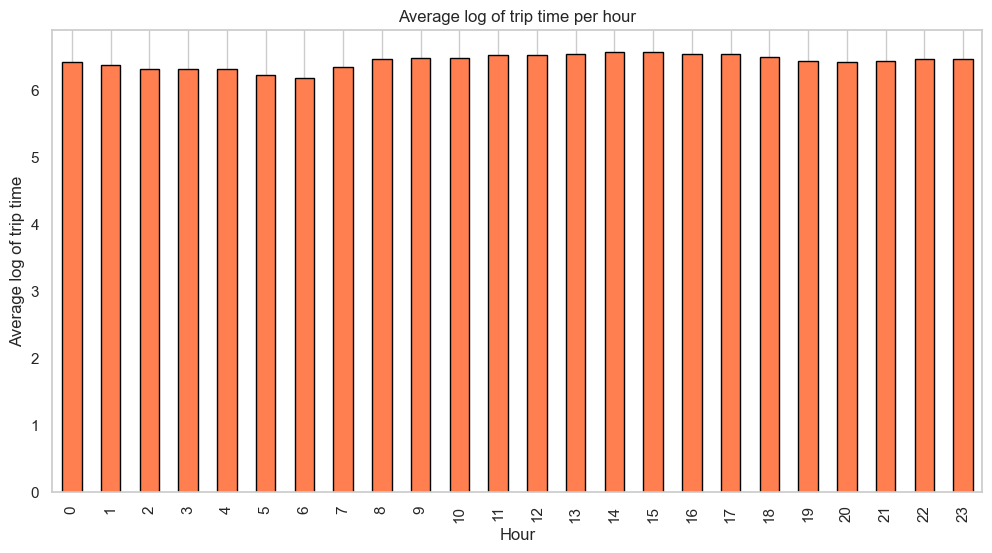

In [239]:
log_trip_duration_per_hour = df_train.groupby('hour')['log_trip_duration'].mean()

plt.figure(figsize=(12, 6))
log_trip_duration_per_hour.plot(kind = 'bar', color='coral', edgecolor='black')
plt.title('Average log of trip time per hour')
plt.xlabel('Hour')
plt.ylabel('Average log of trip time')
plt.grid(axis='y')
plt.show()

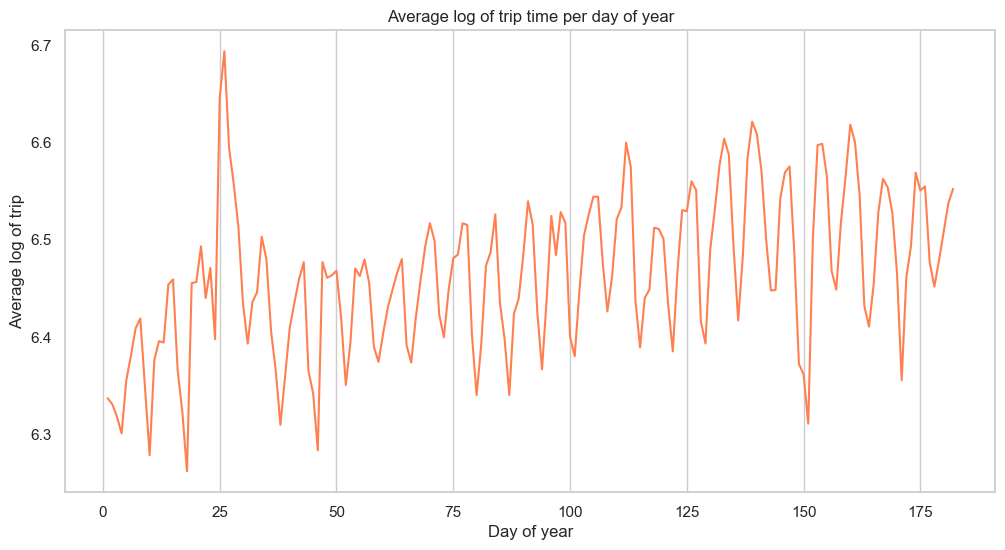

In [240]:
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear

log_trip_duration_per_hour = df_train.groupby('day_of_year')['log_trip_duration'].mean()

plt.figure(figsize=(12, 6))
log_trip_duration_per_hour.plot(color='coral')
plt.title('Average log of trip time per day of year')
plt.xlabel('Day of year')
plt.ylabel('Average log of trip')
plt.grid(axis='y')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [241]:
anomalous_date_1_1 = '2016-01-23'
anomalous_date_1_2 = '2016-01-24'
anomalous_date_2 = '2016-05-23'

df['is_anomalous_period_1'] = ((df['pickup_datetime'].dt.date == pd.to_datetime(anomalous_date_1_1).date() )
                               | (df['pickup_datetime'].dt.date == pd.to_datetime(anomalous_date_1_2).date())).astype(int)
df['is_anomalous_period_2'] = (df['pickup_datetime'].dt.date == pd.to_datetime(anomalous_date_2).date()).astype(int)


df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Из всех признаков которые мы создали, все они категориальные. 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [242]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['day_of_week', 'hour', 'month','is_anomalous_period_1', 'is_anomalous_period_2']  


X = df[categorical_features]
y = df['log_trip_duration']

enc = OneHotEncoder(handle_unknown='ignore')
encoded = enc.fit_transform(X)
one_hot_df = pd.DataFrame(encoded.toarray(), columns=enc.get_feature_names_out(categorical_features))


X_train, X_test, y_train, y_test = train_test_split(one_hot_df, y, test_size=0.3)

ridge_regression = Ridge() 

ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
print('rmse: ', rmsle(y_pred, y_test))

rmse:  0.7892887089029182


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [243]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [244]:
def pickup_latitude_longitude_sample(df):
    help_ = ['pickup_latitude', 'pickup_longitude']
    df_help = df[help_].sample(1000, random_state = 42)
    return [df_help['pickup_latitude'].values, df_help['pickup_longitude'].values]

In [245]:
your_lat_values = pickup_latitude_longitude_sample(df)[0]
your_lon_values = pickup_latitude_longitude_sample(df)[1]

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Можно с легкостью выделить Манхэттан и два аэропорта(John F. Kennedy и Laguardia), полезны они так как из этих мест наиболее часто вызывает такси, это очень человекопроходимые места.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [246]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

df['haversine'] = haversine_array(
    df['pickup_latitude'].values, 
    df['pickup_longitude'].values, 
    df['dropoff_latitude'].values, 
    df['dropoff_longitude'].values
)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [247]:
df['log_haversine'] = np.log1p(df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [248]:
print(df['log_trip_duration'].corr(df['haversine']))
print(df['log_trip_duration'].corr(df['log_haversine']))

0.5735948311180146
0.7498822373942491


Убедились

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [249]:
df['trip_duration'] = np.expm1(df['log_trip_duration'])
df['mean_speed'] = df['haversine'] / df['trip_duration'] * 3600

Средняя скорость измеряется в километрах в час

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

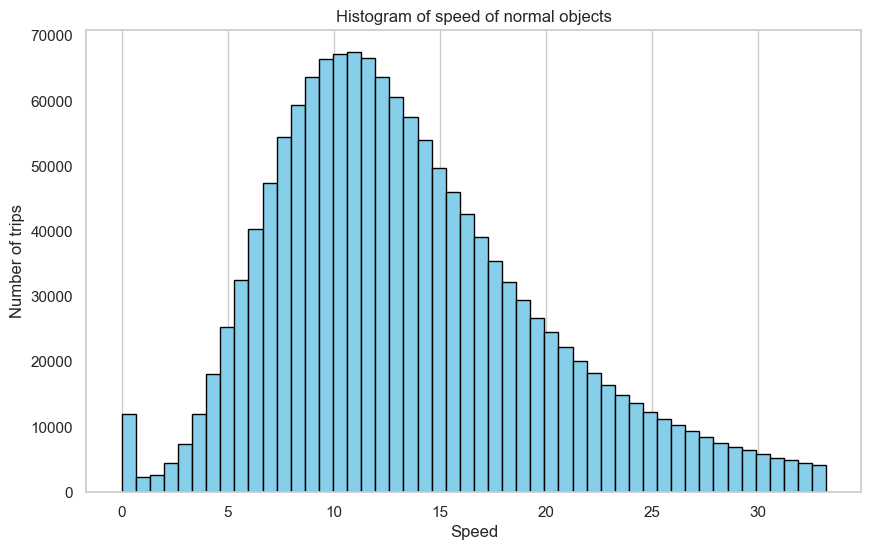

In [250]:
reasonable_speed_df = df[df['mean_speed'] <= df['mean_speed'].quantile(0.97)]

plt.figure(figsize=(10, 6))
plt.hist(reasonable_speed_df['mean_speed'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of speed of normal objects')
plt.xlabel('Speed')
plt.ylabel('Number of trips')
plt.grid(axis='y')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

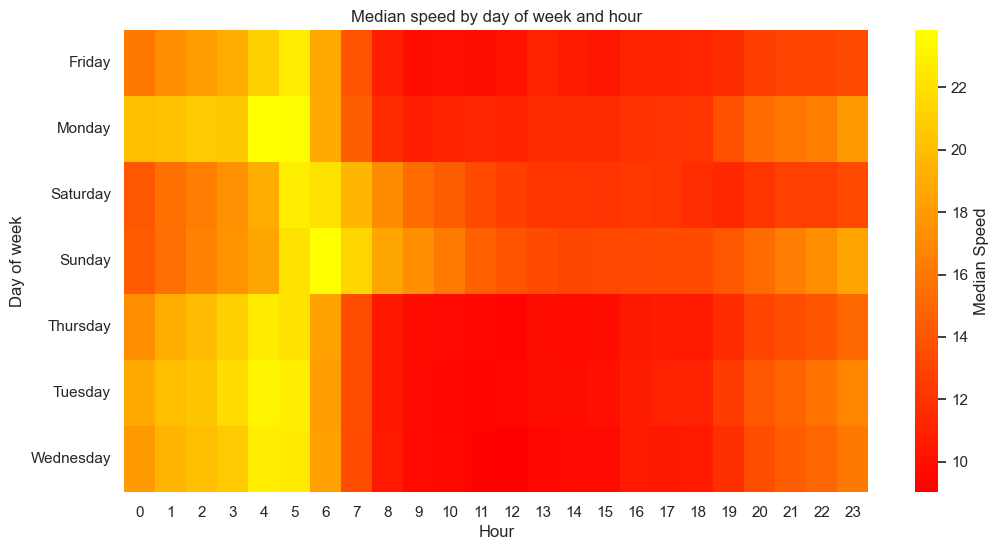

In [251]:
median_speed = df.groupby(['day_of_week', 'hour'])['mean_speed'].median().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(median_speed, cmap='autumn', cbar_kws={'label': 'Median Speed'})
plt.title("Median speed by day of week and hour")
plt.xlabel("Hour")
plt.ylabel("Day of week")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Так как скорость зависит от таргета, и когда мы не будем знать таргет, качество упадет

In [252]:
df = df.drop('mean_speed', axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость очень мала в будние дни минимальна - с 8 до 18(это и логично, так как в эти дни большинство людей работает), максимальна же она по ночам и (очень ранним утрам в выходные), в будни(это связано с тем, что ночью по будням мало кто ездит, а в выходные люди часто тусят и возвращаются домой ночью). 

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [253]:
weekends = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

df['traffic_jam_trip'] = (((df['day_of_week'].isin(weekdays)) & (df['hour'] <= 19) & (8 <= df['hour']))
                          | (df['day_of_week']  == 'Суббота') & (15 <= df['hour'])&(df['hour'] <= 23)
                          |(df['day_of_week']  == 'Воскресенье') & (15 <= df['hour'])&(df['hour'] <= 18))

df['not_traffic_jam_trip'] = (((df['day_of_week'].isin(weekdays)) & ((df['hour'] >19 ) | (8 > df['hour'])))
                              | (df['day_of_week']  == 'Суббота') & (15 > df['hour']) 
                              | (df['day_of_week']  == 'Воскресенье') & (15 > df['hour']) | (df['hour'] > 18))

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [254]:
manh_coord_1 = [40.709207, -74.018887]  # Левый нижний угол
manh_coord_2 = [40.798864, -73.937398]  # Правый верхний угол
Kennedy_coord = [40.643563, -73.782066]
Laguardia_coord = [40.776939, -73.877220]

def is_manhattan_trip(lat, long):
    return (
        (manh_coord_1[0] <= lat <= manh_coord_2[0]) and
        (manh_coord_1[1] <= long <= manh_coord_2[1])
    )
def is_airport_trip(lat, long, coords):
    return np.sqrt((lat - coords[0])**2 + (long - coords[1])**2) <= 0.01

df['pickup_manhattan'] = df.apply(lambda row: is_manhattan_trip(row['pickup_latitude'], row['pickup_longitude']), axis=1).astype(int)
df['dropoff_in_manhattan'] = df.apply(lambda row: is_manhattan_trip(row['dropoff_latitude'], row['dropoff_longitude']), axis=1).astype(int)

df['pickup_in_kennedy'] = df.apply(lambda row: is_airport_trip(row['pickup_latitude'], row['pickup_longitude'], Kennedy_coord), axis=1).astype(int)
df['dropoff_in_kennedy'] = df.apply(lambda row: is_airport_trip(row['dropoff_latitude'], row['dropoff_longitude'], Kennedy_coord), axis=1).astype(int)

df['pickup_in_laguardia'] = df.apply(lambda row: is_airport_trip(row['pickup_latitude'], row['pickup_longitude'], Laguardia_coord), axis=1).astype(int)
df['dropoff_in_laguardia'] = df.apply(lambda row: is_airport_trip(row['dropoff_latitude'], row['dropoff_longitude'], Laguardia_coord), axis=1).astype(int)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

Text(0.5, 1.0, 'Ended in Laguardia')

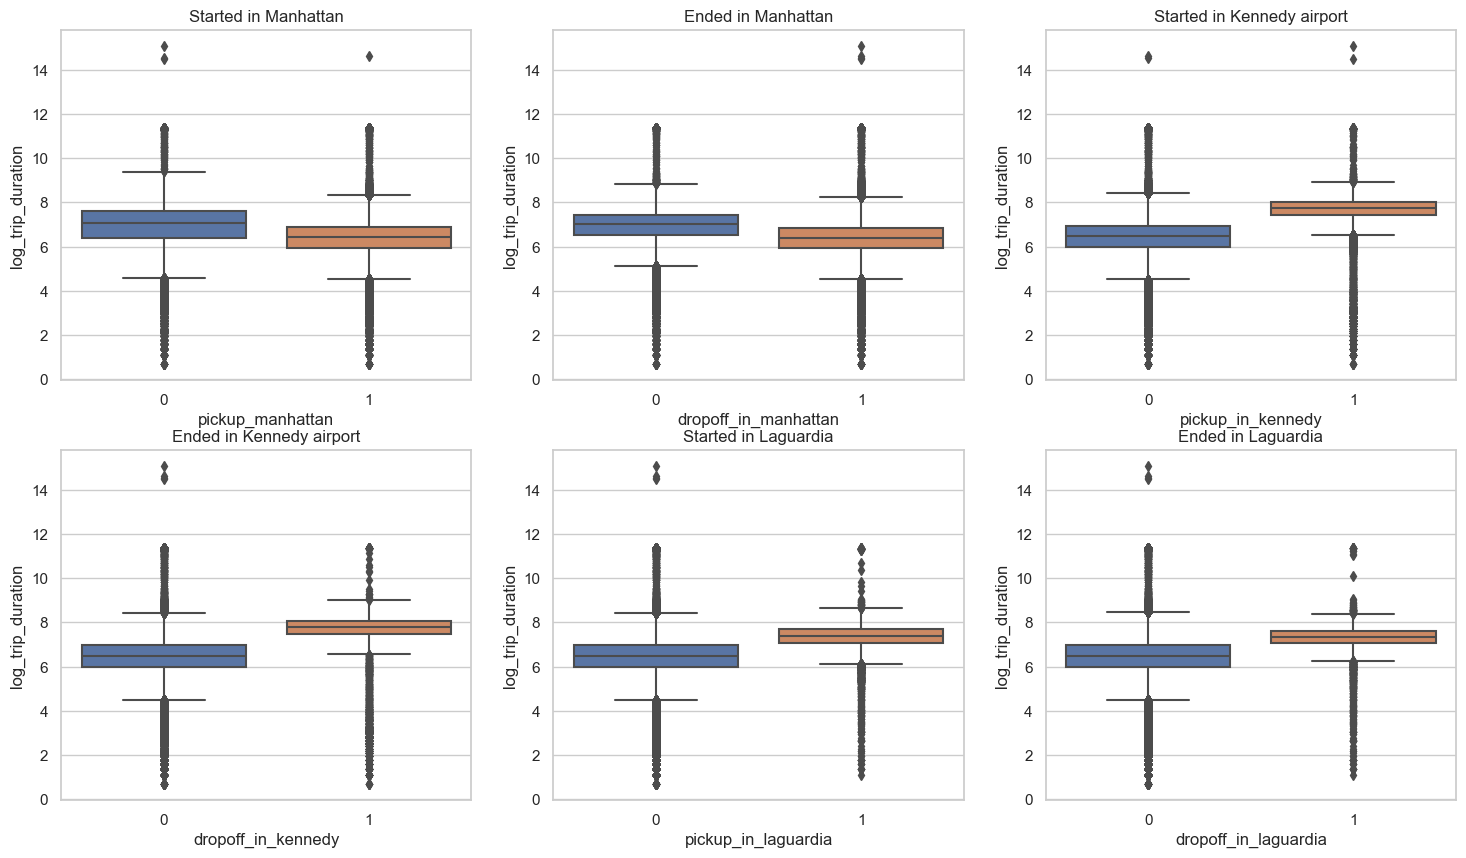

In [255]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='pickup_manhattan', y='log_trip_duration', data=df)
plt.title('Started in Manhattan')

plt.subplot(2, 3, 2)
sns.boxplot(x='dropoff_in_manhattan', y='log_trip_duration', data=df)
plt.title('Ended in Manhattan')

plt.subplot(2, 3, 3)
sns.boxplot(x='pickup_in_kennedy', y='log_trip_duration', data=df)
plt.title('Started in Kennedy airport')

plt.subplot(2, 3, 4)
sns.boxplot(x='dropoff_in_kennedy', y='log_trip_duration', data=df)
plt.title('Ended in Kennedy airport')

plt.subplot(2, 3, 5)
sns.boxplot(x='pickup_in_laguardia', y='log_trip_duration', data=df)
plt.title('Started in Laguardia')

plt.subplot(2, 3, 6)
sns.boxplot(x='dropoff_in_laguardia', y='log_trip_duration', data=df)
plt.title('Ended in Laguardia')


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows
        self.n_cols = n_cols

    def fit(self, X, y=None):
        # Координаты углов прямоугольника Манхэттена
        self.lat_min, self.lon_min = 40.709207, -74.018887  # Левый нижний угол
        self.lat_max, self.lon_max = 40.798864, -73.937398  # Правый верхний угол
        
        # Определим ширину и высоту ячеек
        self.lat_step = (self.lat_max - self.lat_min) / self.n_rows
        self.lon_step = (self.lon_max - self.lon_min) / self.n_cols
        return self

    def transform(self, X, y=None):
        X = X.copy()     
        X['pickup_cell'] = self._get_cell(X['pickup_latitude'], X['pickup_longitude'])
        X['dropoff_cell'] = self._get_cell(X['dropoff_latitude'], X['dropoff_longitude'])
        
        return X
    
    def _get_cell(self, latitudes, longitudes):
        # Рассчитываем индексы ячеек для заданных координат
        row_indices = np.floor((latitudes - self.lat_min) / self.lat_step).astype(int)
        col_indices = np.floor((longitudes - self.lon_min) / self.lon_step).astype(int)
        
        # Для точек за пределами прямоугольника возвращаем -1
        row_indices = np.where((row_indices >= 0) & (row_indices < self.n_rows), row_indices, -1)
        col_indices = np.where((col_indices >= 0) & (col_indices < self.n_cols), col_indices, -1)
        
        # Конвертируем индексы строк и столбцов в уникальные номера ячеек
        cell_numbers = np.where((row_indices != -1) & (col_indices != -1),
                                row_indices * self.n_cols + col_indices + 1, -1)
        return cell_numbers
    
    def show_map(self):
        m = folium.Map(location=[(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2], zoom_start=13)
        
        for row in range(self.n_rows):
            for col in range(self.n_cols):
                # Рассчитываем координаты углов текущей ячейки
                lat_start = self.lat_min + row * self.lat_step
                lat_end = lat_start + self.lat_step
                lon_start = self.lon_min + col * self.lon_step
                lon_end = lon_start + self.lon_step
                
                # Добавляем прямоугольник на карту
                folium.Rectangle(
                    bounds=[[lat_start, lon_start], [lat_end, lon_end]],
                    color="darkblue",
                    weight=3,
                    fill_opacity=0.1
                ).add_to(m)
        
        return m


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [257]:
t = MapGridTransformer(n_rows=4, n_cols=3)
t.fit(df)
df = t.transform(df)
t.show_map()

In [258]:
import scipy.sparse
from sklearn.preprocessing import StandardScaler

categorical_features = ['day_of_week', 'hour', 'month', 'is_anomalous_period_1',
                        'is_anomalous_period_2', 'day_of_year', 'traffic_jam_trip', 'not_traffic_jam_trip', 
                        'pickup_cell', 'dropoff_cell', 'pickup_manhattan', 'dropoff_in_manhattan', 'pickup_in_kennedy',
                        'dropoff_in_kennedy', 'pickup_in_laguardia', 'dropoff_in_laguardia']    
numeric_features = ['log_haversine']

X = df[categorical_features + numeric_features]
y = df['log_trip_duration'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_transformed = scipy.sparse.hstack((X_train_num, X_train_cat))
X_test_transformed = scipy.sparse.hstack((X_test_num, X_test_cat))

model = Ridge()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
print('RMSE на тестовой выборке:', rmsle(y_test, y_pred))

RMSE на тестовой выборке: 0.47386903620481474


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [259]:
unique_vendor_id = df['vendor_id'].nunique()
unique_passenger_count = df['passenger_count'].nunique()
unique_store_and_fwd_flag = df['store_and_fwd_flag'].nunique()

print('Уникальных значений passenger_count: ', unique_passenger_count)
print('Уникальных значений vendor_id: ', unique_vendor_id)
print('Уникальных значений store_and_fwd_flag: ', unique_store_and_fwd_flag)

Уникальных значений passenger_count:  10
Уникальных значений vendor_id:  2
Уникальных значений store_and_fwd_flag:  2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

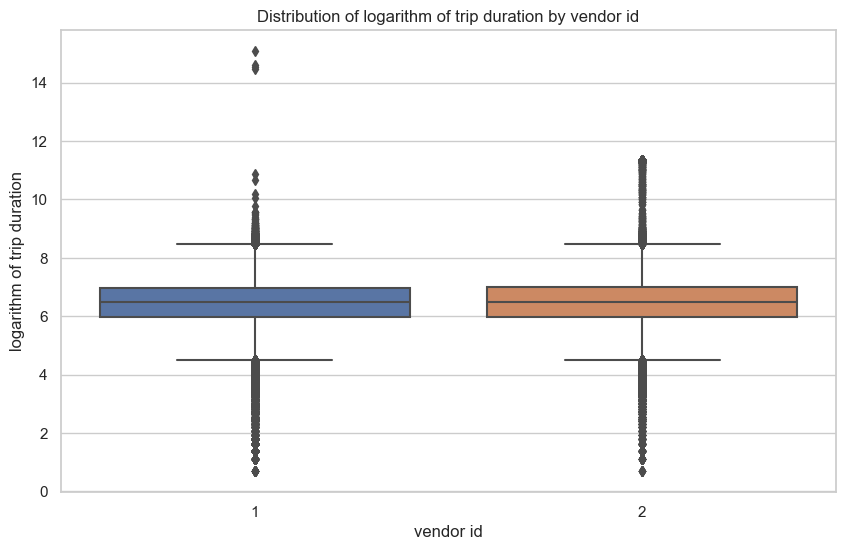

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title('Distribution of logarithm of trip duration by vendor id')
plt.xlabel('vendor id')
plt.ylabel('logarithm of trip duration')
plt.show()

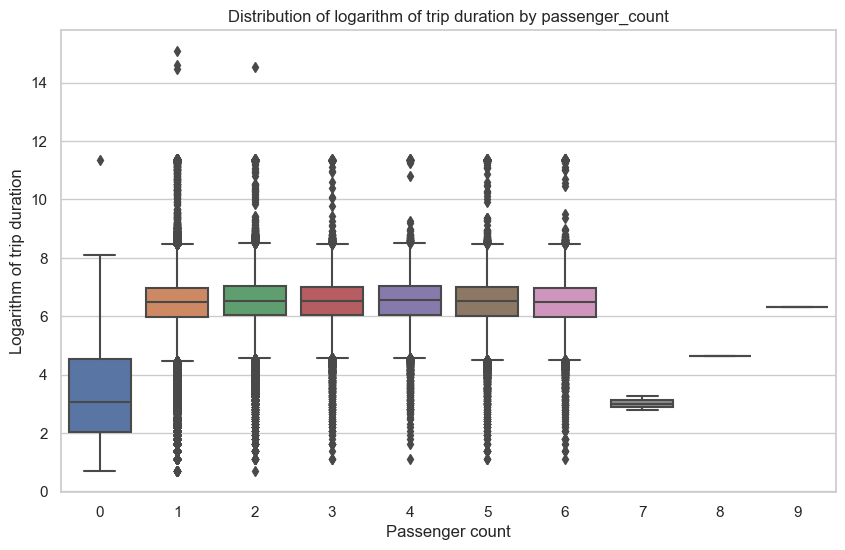

In [261]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title('Distribution of logarithm of trip duration by passenger_count')
plt.xlabel('Passenger count')
plt.ylabel('Logarithm of trip duration')
plt.show()

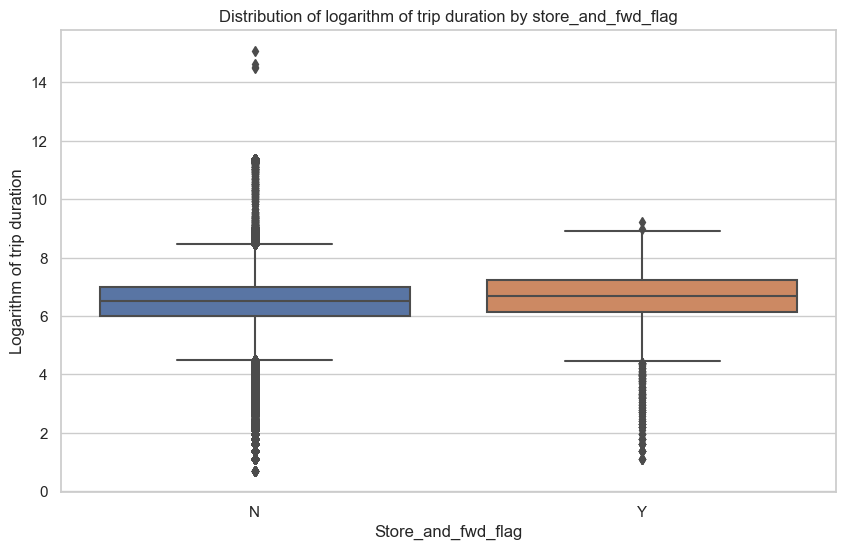

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title('Distribution of logarithm of trip duration by store_and_fwd_flag')
plt.xlabel('Store_and_fwd_flag')
plt.ylabel('Logarithm of trip duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [263]:
df['vendor_id'] = df['vendor_id'].apply(lambda x: x-1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ** Вряд ли от них как будто мало что зависит.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [264]:
from sklearn.preprocessing import StandardScaler
categorical_features = ['day_of_week', 'hour', 'month','is_anomalous_period_1', 'is_anomalous_period_2',
                        'day_of_year', 'traffic_jam_trip', 'not_traffic_jam_trip', 'store_and_fwd_flag', 
                        'vendor_id', 'passenger_count', 'pickup_cell', 'dropoff_cell' , 'pickup_manhattan', 'dropoff_in_manhattan', 'pickup_in_kennedy',
                        'dropoff_in_kennedy', 'pickup_in_laguardia', 'dropoff_in_laguardia']     
numeric_features = ['log_haversine']

X = df[categorical_features + numeric_features]
y = df['log_trip_duration'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])


scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_transformed = scipy.sparse.hstack((X_train_num, X_train_cat))
X_test_transformed = scipy.sparse.hstack((X_test_num, X_test_cat))

model = Ridge()
model.fit(X_train_transformed, y_train)

y_pred_train = model.predict(X_train_transformed)
y_pred = model.predict(X_test_transformed)
print('RMSE на тестовой выборке:', rmsle(y_test, y_pred))

RMSE на тестовой выборке: 0.4733932767228823


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

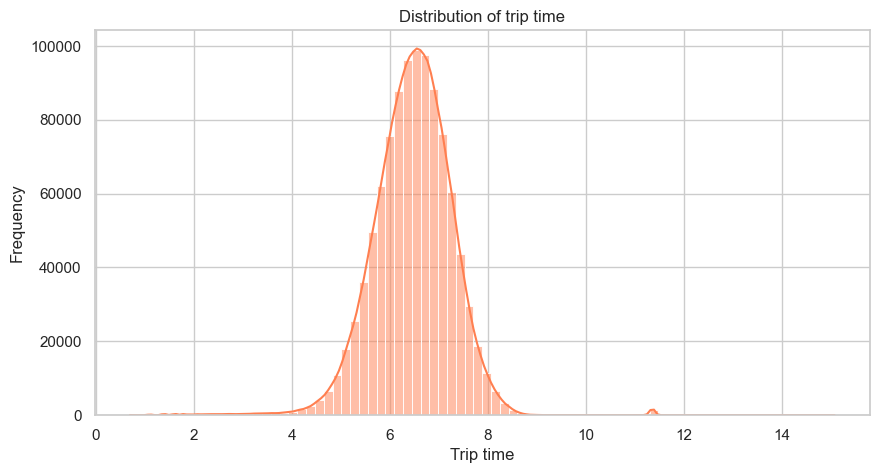

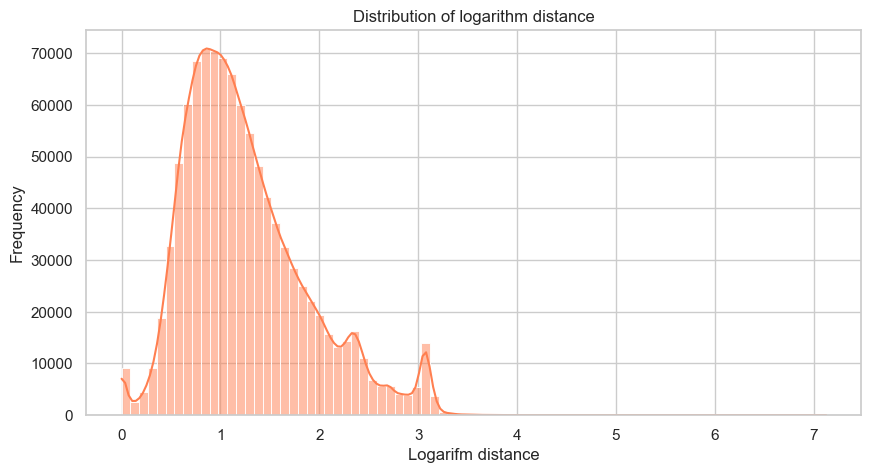

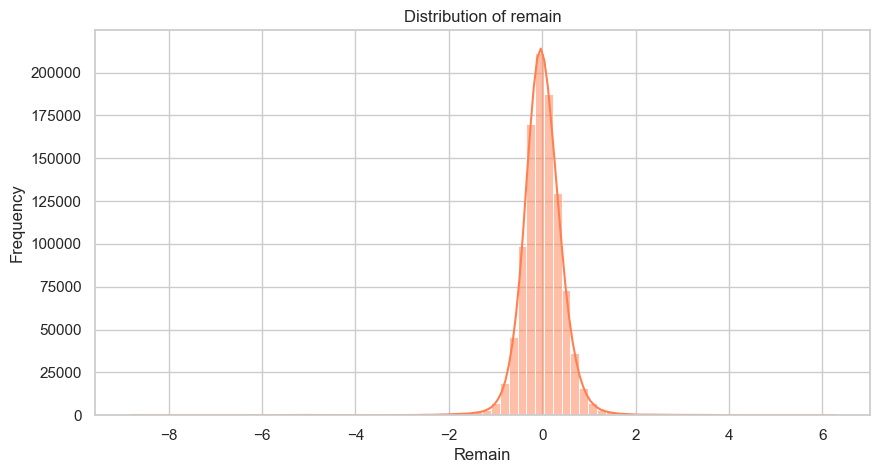

In [265]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=80, kde=True, color='coral')
plt.title('Distribution of trip time')
plt.xlabel('Trip time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(X_train['log_haversine'], bins=80, kde=True, color='coral')
plt.title('Distribution of logarithm distance')
plt.xlabel('Logarifm distance')
plt.ylabel('Frequency')
plt.show()


res = y_pred_train - y_train
plt.figure(figsize=(10, 5))
sns.histplot(res, bins=80, kde = True, color='coral')
plt.title('Distribution of remain')
plt.xlabel('Remain')
plt.ylabel('Frequency')
plt.show()

In [266]:
# чтобы убрать выбросы в таргете, используем просто 3 стандартных отклонения
mean_trip = y_train.mean()
std_trip = y_train.std()
lower_bound_trip = mean_trip - 3 * std_trip
upper_bound_trip = mean_trip + 3 * std_trip

# чтобы убрать выбросы в логарифме расстояния, используем просто 3 стандартных отклонения
mean_distance = X_train['log_haversine'].mean()
std_distance = X_train['log_haversine'].std()
lower_bound_distance = mean_distance - 3 * std_distance
upper_bound_distance = mean_distance + 3 * std_distance

# тут используем квантили, потому что значения очень близко к нулю расположены
Q1 = res.quantile(0.25)
Q2 = res.quantile(0.75)
IQR = Q2 - Q1

lower_bound = Q1 - 10 * IQR
upper_bound = Q2 + 10 * IQR


mask = (res >= lower_bound) & (res <= upper_bound) & (X_train['log_haversine'] >= lower_bound_distance) & (X_train['log_haversine'] <= upper_bound_distance) & (y_train >= lower_bound_trip) & (y_train <= upper_bound_trip)

cleaned_X_train = X_train[mask]
cleaned_y_train = y_train[mask]

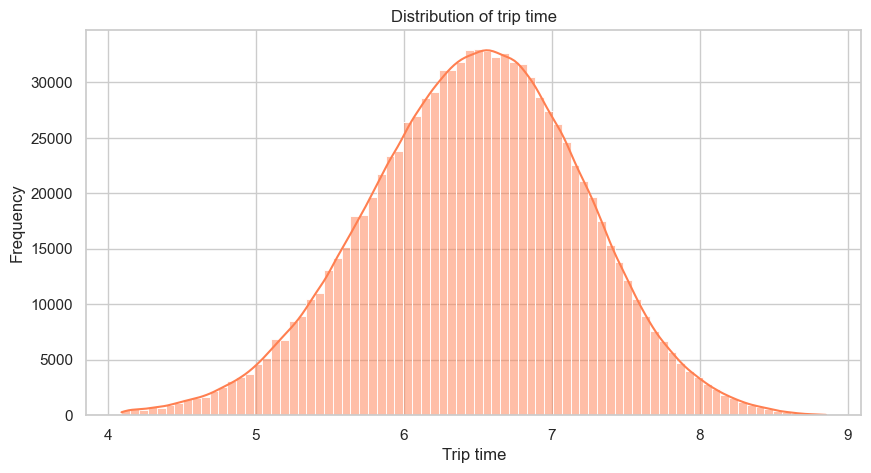

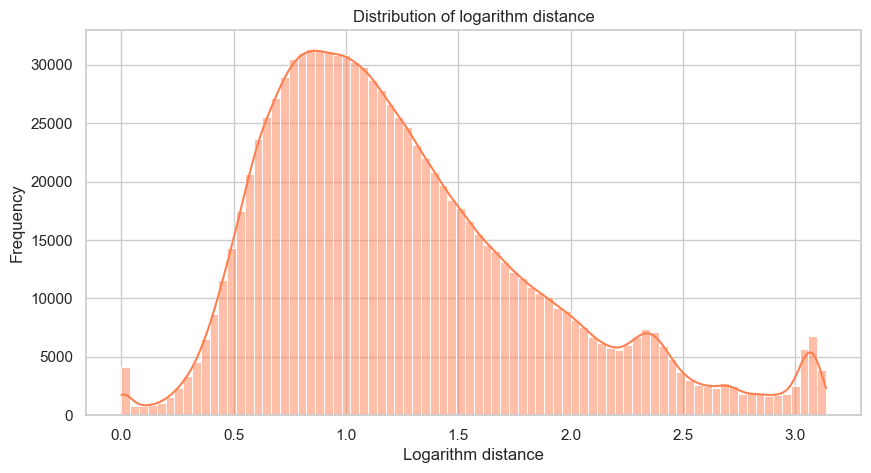

In [267]:

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_y_train, bins=80, kde=True, color='coral')
plt.title('Distribution of trip time')
plt.xlabel('Trip time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_X_train['log_haversine'], bins=80, kde=True, color='coral')
plt.title('Distribution of logarithm distance')
plt.xlabel('Logarithm distance')
plt.ylabel('Frequency')
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [272]:
def combine_rare_categories(df, categorical_features):
    df = df.copy() 
    for col in categorical_features:
        freq = df[col].value_counts(normalize=True)
        rare_categories = a[a < 0.01].index
        df.loc[:, col] = df[col].replace(rare_categories, 'new')
    return df


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [273]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(cleaned_X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])


scaler = StandardScaler()
X_train_num = scaler.fit_transform(cleaned_X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_transformed = scipy.sparse.hstack((X_train_num, X_train_cat))
X_test_transformed = scipy.sparse.hstack((X_test_num, X_test_cat))

model = Ridge()
model.fit(X_train_transformed, cleaned_y_train)

y_pred = model.predict(X_test_transformed)
rmse = rmsle(y_test, y_pred)
print('RMSE на тестовой выборке:', rmse)

/Users/semyonzotov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSE на тестовой выборке: 0.4750769039147828


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [274]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_enc = encoder.fit_transform(cleaned_X_train[categorical_features])

print(cleaned_X_train.shape[1])
print(X_enc.shape[1] + len(numeric_features))

20
260


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [275]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(cleaned_X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(cleaned_X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_transformed = scipy.sparse.hstack((X_train_num, X_train_cat))
X_test_transformed = scipy.sparse.hstack((X_test_num, X_test_cat))

model = Lasso()
model.fit(X_train_transformed, cleaned_y_train)

y_pred = model.predict(X_test_transformed)
print('RMSE на тестовой выборке:', rmsle(y_test, y_pred))

/Users/semyonzotov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSE на тестовой выборке: 0.7950690839068435


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [276]:
cleaned_X_train_val, X_val, cleaned_y_train_val, y_val = train_test_split(
    X_train_transformed, cleaned_y_train, test_size=0.3, random_state=42)

alphas = np.logspace(-4, 4, 20)

ridge_rmsle = []
lasso_rmsle = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(cleaned_X_train_val, cleaned_y_train_val)
    y_pred = ridge.predict(X_val)
    ridge_errors.append(rmsle(y_val, y_pred))

lasso_zero_weights = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(cleaned_X_train_val, cleaned_y_train_val)
    y_pred = lasso.predict(X_val)
    lasso_errors.append(rmsle(y_val, y_pred))
    lasso_zero_weights.append(np.sum(model.coef_ == 0))

In [277]:
best_ridge_alpha = alphas[np.argmin(ridge_errors)]
best_lasso_alpha = alphas[np.argmin(lasso_errors)]

In [278]:
best_ridge = Ridge(alpha=best_ridge_alpha)
best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000)

best_ridge.fit(X_train_transformed, cleaned_y_train)
best_lasso.fit(X_train_transformed, cleaned_y_train)

y_pred_ridge = best_ridge.predict(X_test_transformed)
y_pred_lasso = best_lasso.predict(X_test_transformed)

print("best_ridge_alpha:", best_ridge_alpha)
print("best_lasso_alpha:", best_lasso_alpha)
print("ridge_rmsle:", rmsle(y_test, y_pred_ridge))
print("lasso_rmse:", rmsle(y_test, y_pred_lasso))

best_ridge_alpha: 0.0006951927961775605
best_lasso_alpha: 0.0001
ridge_rmsle: 0.47507679793176466
lasso_rmse: 0.47558523504332445


Сохраните наилучшее значение, как бенчмарк на будущее

In [279]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.47507679793176466

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

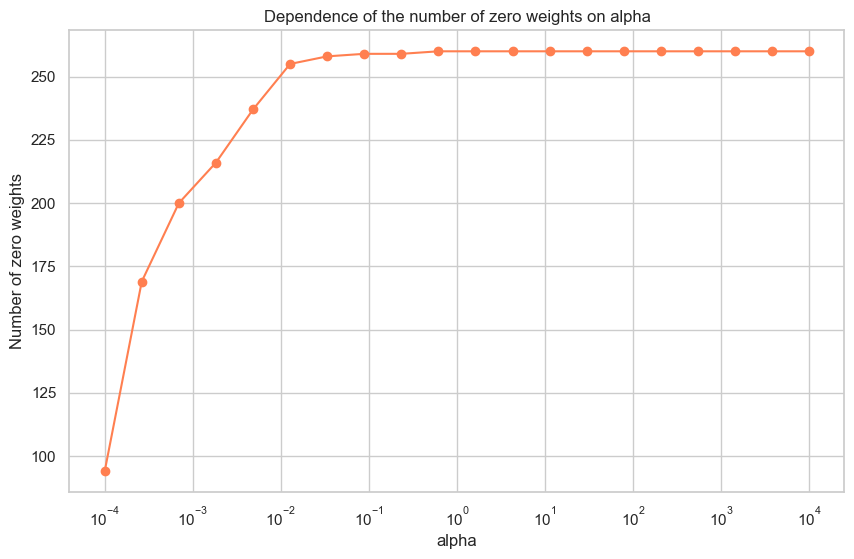

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_zero_weights, marker='o', color='coral')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Number of zero weights')
plt.title('Dependence of the number of zero weights on alpha')
plt.show()

In [281]:
rmsle_val = 1
for i in range(len(alphas)):
    if lasso_zero_weights[i] >= (X_train_transformed.shape[1] // 2):
        if rmsle_val > lasso_errors[i]:
            alpha_val = alphas[i]
            rmsle_val = lasso_errors[i]
            zero_weights_count = lasso_zero_weights[i]
print('alpha:', alpha_val)
print('rmsle:', rmsle_val)

alpha: 0.00026366508987303583
rmsle: 0.4055776080528973


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [282]:
top_routes = cleaned_X_train.groupby(['pickup_cell', 'dropoff_cell']).size().nlargest(100).reset_index()[['pickup_cell', 'dropoff_cell']]
cleaned_X_train = cleaned_X_train.merge(top_routes.assign(top_route=True), on=['pickup_cell', 'dropoff_cell'], 
                                        how='left').fillna({'top_route': False})

X_test = X_test.merge(top_routes.assign(top_route=True), 
                      on=['pickup_cell', 'dropoff_cell'], 
                      how='left').fillna({'top_route': False})

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [283]:
categorical_features.append('top_route')

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_train = encoder.fit_transform(cleaned_X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(cleaned_X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_transformed = scipy.sparse.hstack((X_train_num, encoded_train))
X_test_transformed = scipy.sparse.hstack((X_test_num, encoded_test))

model = Ridge()
model.fit(X_train_transformed, cleaned_y_train)

y_pred = model.predict(X_test_transformed)
print('RMSE на тестовой выборке:', rmsle(y_test, y_pred))

RMSE на тестовой выборке: 0.4747929812932999


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Название «манхэттенское расстояние» связано с уличной планировкой Манхэттена. расстояние между двумя точками равно сумме модулей разностей их координат.


Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [284]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [293]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_train = encoder.fit_transform(cleaned_X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

min_max_scaler = MinMaxScaler()
X_train_num = min_max_scaler.fit_transform(cleaned_X_train[numeric_features])
X_test_num = min_max_scaler.transform(X_test[numeric_features])


X_train_transformed = scipy.sparse.hstack((X_train_num, encoded_train))
X_test_transformed = scipy.sparse.hstack((X_test_num, encoded_test))

model = Ridge()
model.fit(X_train_transformed, cleaned_y_train)

y_pred = model.predict(X_test_transformed)
print('RMSE на тестовой выборке:', rmsle(y_test, y_pred))
print('разница:', best_rmsle - rmsle(y_test, y_pred))

RMSE на тестовой выборке: 0.47479205294393984
разница: 0.0002847449878248254


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.